# Bagging Machine Learning Algorithm

### **B**ootstrap **Agg**regat**ing** or [Bagging](https://en.wikipedia.org/wiki/Bootstrap_aggregating)
* [Scikit- Learn Reference](http://scikit-learn.org/stable/modules/ensemble.html#bagging)
* Bootstrap sampling: Sampling with replacement
* Combine by averaging the output (regression)
* Combine by voting (classification)
* Can be applied to many classifiers which includes ANN, CART, etc.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df.shape

(891, 15)

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.dropna(inplace=True)

In [6]:
df['pclass'].unique()

array([1, 3, 2], dtype=int64)

In [7]:
df['pclass'].value_counts()

1    157
2     15
3     10
Name: pclass, dtype: int64

In [8]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [9]:
df['sex'].value_counts()

male      94
female    88
Name: sex, dtype: int64

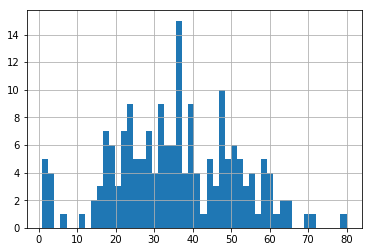

In [10]:
df['age'].hist(bins=50);

## Data Pre-processing

In [11]:
X = df[['pclass', 'sex', 'age']]

In [12]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

In [13]:
X['sex'] = lb.fit_transform(X['sex'])

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [14]:
X.head()

,pclass,sex,age
1,1,0,38.0
3,1,0,35.0
6,1,1,54.0
10,3,0,4.0
11,1,0,58.0


In [15]:
X.shape

(182, 3)

In [16]:
X.describe()

,pclass,sex,age
count,182.000000,182.000000,182.000000
mean,1.192308,0.516484,35.623187
std,0.516411,0.501107,15.671615
min,1.000000,0.000000,0.920000
25%,1.000000,0.000000,24.000000
50%,1.000000,1.000000,36.000000
75%,1.000000,1.000000,47.750000
max,3.000000,1.000000,80.000000


In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 1 to 889
Data columns (total 3 columns):
pclass    182 non-null int64
sex       182 non-null int32
age       182 non-null float64
dtypes: float64(1), int32(1), int64(1)
memory usage: 10.0 KB


In [18]:
y = df['survived']

In [19]:
y.value_counts()

1    123
0     59
Name: survived, dtype: int64

***

# Random Forest

[paper](http://ect.bell-labs.com/who/tkh/publications/papers/odt.pdf)

* Ensemble of Decision Trees

* Training via the bagging method (Repeated sampling with replacement)
  * Bagging: Sample from samples
  * RF: Sample from predictors. $m=sqrt(p)$ for classification and $m=p/3$ for regression problems.

* Utilise uncorrelated trees

Random Forest
* Sample both observations and features of training data

Bagging
* Samples only observations at random
* Decision Tree select best feature when splitting a node

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [23]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score
def print_score(clf, X_train, X_test, y_train, y_test, train=True):
    '''
    v0.1 Follow the scikit learn library format in terms of input
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_train)
    if train:
        '''
        training performance
        '''
        res = clf.predict(X_train)
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, 
                                                                res)))
        print("Classification Report: \n {}\n".format(classification_report(y_train, 
                                                                            res)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, 
                                                                  res)))
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_train), 
                                                      lb.transform(res))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        res_test = clf.predict(X_test)
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, 
                                                                res_test)))
        print("Classification Report: \n {}\n".format(classification_report(y_test, 
                                                                            res_test)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, 
                                                                  res_test)))   
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_test), 
                                                      lb.transform(res_test))))
        

In [24]:
rf_clf = RandomForestClassifier(random_state=42)

In [25]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [26]:
print_score(rf_clf, X_train, X_test, y_train, y_test, train=True)
print_score(rf_clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9325

Classification Report: 
              precision    recall  f1-score   support

          0       0.94      0.85      0.89        54
          1       0.93      0.97      0.95       109

avg / total       0.93      0.93      0.93       163


Confusion Matrix: 
 [[ 46   8]
 [  3 106]]

ROC AUC: 0.9122

Average Accuracy: 	 0.7988
Accuracy SD: 		 0.0887
Test Result:

accuracy score: 0.7895

Classification Report: 
              precision    recall  f1-score   support

          0       0.67      0.40      0.50         5
          1       0.81      0.93      0.87        14

avg / total       0.77      0.79      0.77        19


Confusion Matrix: 
 [[ 2  3]
 [ 1 13]]

ROC AUC: 0.6643



## Grid Search

In [27]:
from sklearn.pipeline import Pipeline

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
rf_clf = RandomForestClassifier(random_state=42)

In [30]:
params_grid = {"max_depth": [3, None],
               "min_samples_split": [2, 3, 10],
               "min_samples_leaf": [1, 3, 10],
               "bootstrap": [True, False],
               "criterion": ['gini', 'entropy']}

In [31]:
grid_search = GridSearchCV(rf_clf, params_grid,
                           n_jobs=-1, cv=5,
                           verbose=1, scoring='accuracy')

In [32]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   11.8s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'bootstrap': [True, False], 'min_samples_leaf': [1, 3, 10], 'min_samples_split': [2, 3, 10], 'max_depth': [3, None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [33]:
grid_search.best_score_

0.82208588957055218

In [34]:
grid_search.best_estimator_.get_params()

{'bootstrap': False,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [35]:
print_score(grid_search, X_train, X_test, y_train, y_test, train=True)
print_score(grid_search, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.8834

Classification Report: 
              precision    recall  f1-score   support

          0       0.84      0.80      0.82        54
          1       0.90      0.93      0.91       109

avg / total       0.88      0.88      0.88       163


Confusion Matrix: 
 [[ 43  11]
 [  8 101]]

ROC AUC: 0.8615

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    9.4s finished


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 353 out of 360 | elapsed:    8.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    8.1s finished


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    8.2s finished


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 353 out of 360 | elapsed:    9.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    9.0s finished


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    7.5s finished


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    7.4s finished


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    7.8s finished


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    9.8s finished


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   10.6s finished


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    9.2s


Average Accuracy: 	 0.7995
Accuracy SD: 		 0.0863
Test Result:

accuracy score: 0.7895

Classification Report: 
              precision    recall  f1-score   support

          0       0.67      0.40      0.50         5
          1       0.81      0.93      0.87        14

avg / total       0.77      0.79      0.77        19


Confusion Matrix: 
 [[ 2  3]
 [ 1 13]]

ROC AUC: 0.6643



[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   12.2s finished


***

# Extra-Trees (Extremely Randomized Trees) Ensemble

[scikit-learn](http://scikit-learn.org/stable/modules/ensemble.html#bagging)

* Random Forest is build upon Decision Tree
* Decision Tree node splitting is based on gini or entropy or some other algorithms
* Extra-Trees make use of random thresholds for each feature unlike Decision Tree


In [36]:
from sklearn.ensemble import ExtraTreesClassifier

In [37]:
xt_clf = ExtraTreesClassifier(random_state=42)

In [38]:
xt_clf.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [39]:
print_score(xt_clf, X_train, X_test, y_train, y_test, train=True)
print_score(xt_clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9387

Classification Report: 
              precision    recall  f1-score   support

          0       0.89      0.93      0.91        54
          1       0.96      0.94      0.95       109

avg / total       0.94      0.94      0.94       163


Confusion Matrix: 
 [[ 50   4]
 [  6 103]]

ROC AUC: 0.9354

Average Accuracy: 	 0.7495
Accuracy SD: 		 0.1021
Test Result:

accuracy score: 0.8421

Classification Report: 
              precision    recall  f1-score   support

          0       0.75      0.60      0.67         5
          1       0.87      0.93      0.90        14

avg / total       0.84      0.84      0.84        19


Confusion Matrix: 
 [[ 3  2]
 [ 1 13]]

ROC AUC: 0.7643



***

In [40]:
def eval_gini(y_true, y_prob):
    """
    Original author CPMP : https://www.kaggle.com/cpmpml
    In kernel : https://www.kaggle.com/cpmpml/extremely-fast-gini-computation
    """
    y_true = np.asarray(y_true)
    y_true = y_true[np.argsort(y_prob)]
    ntrue = 0
    gini = 0
    delta = 0
    n = len(y_true)
    for i in range(n-1, -1, -1):
        y_i = y_true[i]
        ntrue += y_i
        gini += y_i * delta
        delta += 1 - y_i
    gini = 1 - 2 * gini / (ntrue * (n - ntrue))
    return gini

***